<a href="https://colab.research.google.com/github/dablro12/AI_study/blob/main/Lab03_torch_library_use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
#import moduel config
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn 
import random 
import torch.optim as optim
#google drive <-> colab mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
#pandas dataframe 불러오기
EXCEL_PATH = '/content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/data/0327/data0327.xlsx'
df = pd.read_excel(EXCEL_PATH)
df.head()

,취미,운동,공부,수면,오늘기분
0,8.0,0.0,2.0,12.0,0.0
1,3.0,0.0,3.0,7.0,1.0
2,1.0,0.0,5.0,7.0,1.0
3,2.0,1.0,6.0,8.0,3.0
4,3.0,2.0,2.0,7.0,5.0


In [134]:
#y = X * w + b 에서 가져올 x, y 정의
#x는 취미,운동,공부,수면 data를 가져와야함
x_class=df[['취미','운동','공부','수면']]
y_class=df[['오늘기분']]
#X,Y를 tensor형태로 바꿔주기 위해 object : pandas -> numpy -> torch로 바꿔줌. .to_numpy(), to(torch.float) 이용
# var.to_numpy(), var.to(torch.{dtype})  
##x는 취미,운동,공부,수면을 가져와야함
X = torch.tensor(x_class.to_numpy()).to(torch.float) #torch.tensor 형태로 만들거고, x_class에 대해 
##y는 오늘기분 data를 가져와야함
y = torch.tensor(y_class.to_numpy()).to(torch.float)
print(f"x shape : {X.shape}, y shape : {Y.shape}, x dtype : {X.dtype}, y dtype : {Y.dtype}")

# w(가중치)에 대한 tensor형태를 정의해줘야함 -> 1차원 텐서로  
w = torch.ones(4, requires_grad = True) #requires_grad = True, 가중치를 업데이트해줘야하므로 True로 설정
print(f"w shape : {w.shape}, w dtype : {w.dtype}")

# b(bias)는 0차원 텐서(스칼라값으로 부여해주기) 
b = torch.ones(1, requires_grad = True) #b도 게속 업데이트되어야하므로 True로 설정
print(f"b shape : {b.shape}, b dtype : {b.dtype}")

#Hypter parameter config 
batch_size = len(X)/4 #-> MINI = 데이터크기/N해줘야함
l_rate = 0.001 #Learning Rate 설정 0.001로 설정

X_vd = X.clone()
y_vd = y.clone()

# data loader
def data_iter(data, label, batch_size):
  N,num_features = data.shape
  inds = list(range(N))
  random.shuffle(inds)
  for i in range(0,N,batch_size):
    batch_inds = inds[i:min(i+batch_size, N)]
    batch_data = data[batch_inds,:]
    batch_label = label[batch_inds]
    yield batch_data, batch_label



x shape : torch.Size([33, 4]), y shape : torch.Size([33, 1]), x dtype : torch.float32, y dtype : torch.float32
w shape : torch.Size([4]), w dtype : torch.float32
b shape : torch.Size([1]), b dtype : torch.float32


In [135]:
model = nn.Linear(4,1)
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

In [136]:
batch_size = 33
num_epoch = 100
loss_valid_epoch = []
loss_valid_step = []
for j in np.arange(0, num_epoch):
  mydata_iter = data_iter(X,y, batch_size)
  for batch_X, batch_y in mydata_iter:
    y_hat = model(batch_X) # 1. forward
    l = loss(y_hat, batch_y) # 2. loss calculation
    optimizer.zero_grad() 
    l.backward()  # 3. backward
    optimizer.step() #4. parameter update
    loss_valid_step.append(l.sum().detach()/len(batch_X))
    
  y_vd_hat = model(batch_X)
  l_all = loss(y_vd_hat, y_vd)
  loss_valid_epoch.append(l_all.sum().detach()/len(X_vd))
print(y_hat.shape)

torch.Size([33, 1])


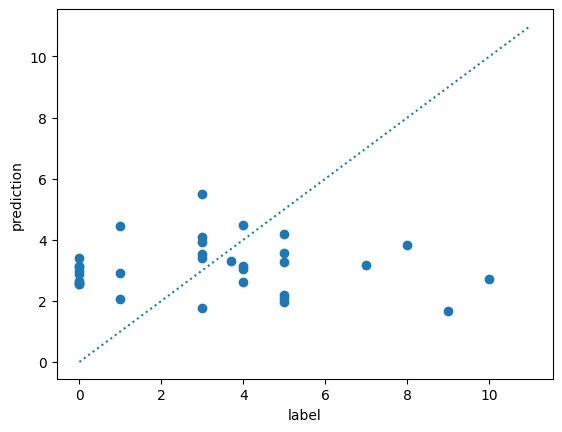

In [137]:
plt.scatter(y,y_vd_hat.detach().numpy())
plt.plot(np.arange(0,12),np.arange(0,12),':')
plt.xlabel('label')
plt.ylabel('prediction')
plt.show()


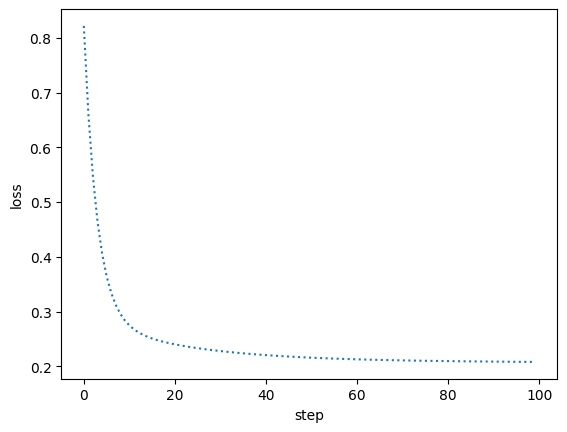

In [138]:
plt.plot(loss_valid_step,':')
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

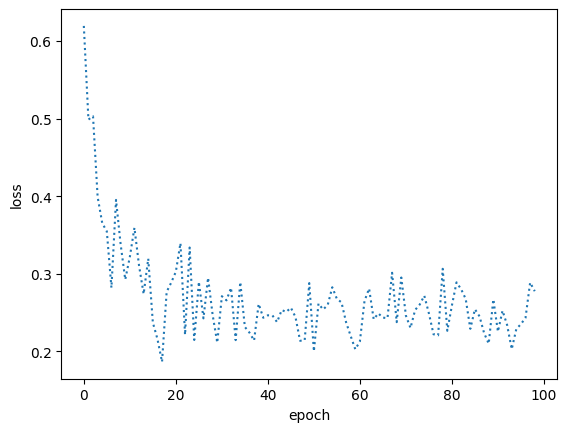

In [139]:
plt.plot(loss_valid_epoch[:-1],':')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()